<center style="font-weight: bold; font-size: 20px; padding: 20px;">Aziz ul haq</center>
<center style="font-weight: bold; font-size: 20px; padding: 20px;">Titanic_Assignment</center>
<center style="font-weight: bold; font-size: 20px; padding: 20px;">Decision_Tree</center>

## Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Step 1: Load the Titanic dataset
df = pd.read_csv(r'C:\Users\DELL XPS\Desktop\AI & ML\Data\titanic.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
# Step 2: Data Cleaning
# Drop unnecessary columns
df.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [4]:
# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)  #df['Age'].fillna(df['Age'].median().inplace())
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) #df['Embarked'.fillna(df['Embarked'.mode()[0]])]

C:\Users\DELL XPS\AppData\Local\Temp\ipykernel_12600\1230447520.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\DELL XPS\AppData\Local\Temp\ipykernel_12600\1230447520.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [5]:
# Convert categorical variables to numerical
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [6]:
# Step 3: Data Preprocessing
X = df.drop("Survived", axis=1)
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Step 4: Apply Decision Tree model
model = DecisionTreeClassifier(max_depth=5, random_state=42) #model = DecisionTreeClassfier(max_depth=5,random_state=42)
model.fit(X_train, y_train)  #model.fit(x_train,y_train)
y_pred = model.predict(X_test) #y_pred = model.predict

In [8]:
# Step 5: Model Evaluation
accuracy = accuracy_score(y_test, y_pred)  #accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)  #conf_matrix = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test, y_pred) #class_report = classfication_report(y_test,y_pred)

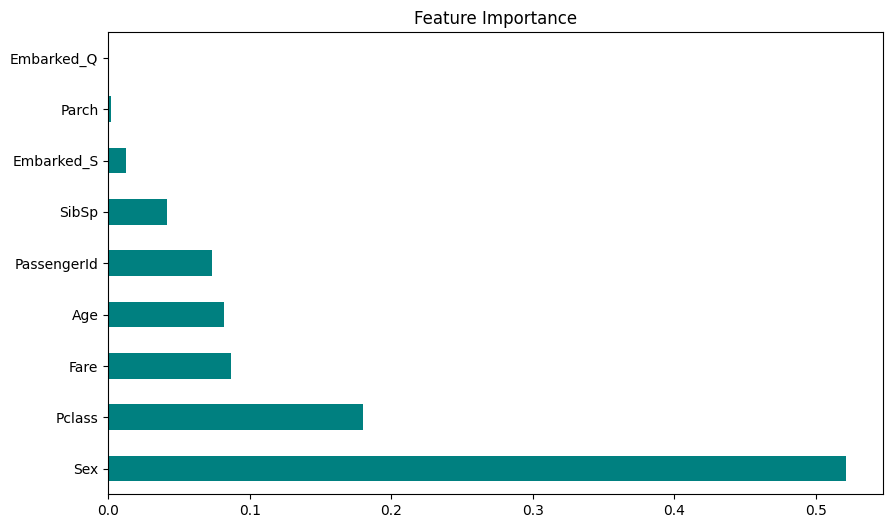

In [9]:
# Step 6: Data Visualization
# Plot feature importance
plt.figure(figsize=(10, 6))  #plt.figure(figsize+(10,6))
feature_importances = pd.Series(model.feature_importances_, index=X.columns) #feature_importances = pd.Series(model.feature_importance_,index=X.columns)
feature_importances.nlargest(10).plot(kind='barh', color='teal') #feature_importances.largest(10).plot(kind='barh',color='teal')
plt.title("Feature Importance") #plt.title("Feature Importance")
plt.show() #plt.show()

C:\Users\DELL XPS\AppData\Local\Temp\ipykernel_12600\3298434632.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=df, palette='coolwarm')


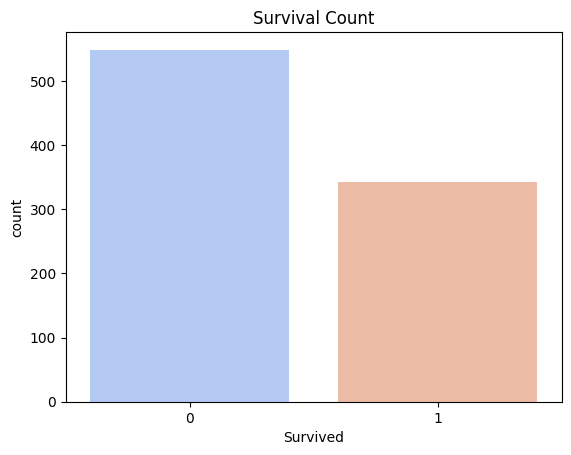

In [10]:
# Plot survival distribution
sns.countplot(x="Survived", data=df, palette='coolwarm') #sns.countpolt(x="Survied",data=df,palette='coolwarm)
plt.title("Survival Count") #plt.title("Survival Count")
plt.show() #plt.show()

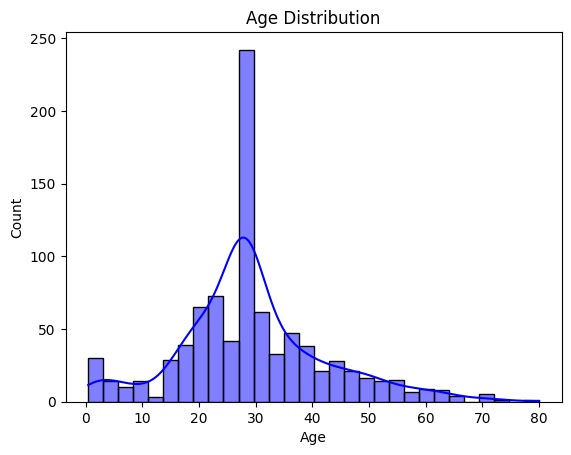

In [11]:
# Plot age distribution
sns.histplot(df['Age'], bins=30, kde=True, color='blue') #sns.histplot(df["Age"],bins=30,kde=True,color='blue')
plt.title("Age Distribution") #plt.title("Age Distribution")
plt.show() #plt.show()